# Exercise 1: Simple/Polynomial Linear Regression

- Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the predicted values vs the values from the test dataset.

- Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

- Which one of the 4 models will you use and why?

## Import Libraries and Preprocess the Data

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [71]:
data = pd.read_csv('../Salary_Data.csv')

In [104]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
#Select X and y values (predictor and outcome)
X = data.iloc[:,:-1].values # YearsExperience
y = data.iloc[:,-1].values # Salary

# Part 1: Simple Linear Regression 
Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the predicted vs the values from the test dataset.

## Perform Train-Test Split on Salary Data 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 10 samples.


## Create and Fit the Model

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [76]:
print(model.intercept_, model.coef_)

26816.19224403119 [9345.94244312]


## Predict the outcome using Model

In [77]:
predictions = model.predict(X_test)

## Visualize 
#### Plot regression line and actual Train and Test data  

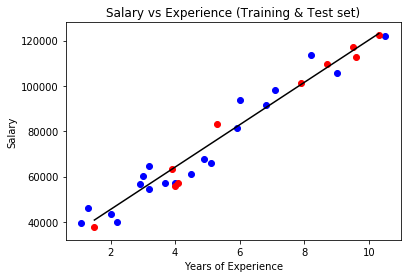

In [78]:
#put X and y together in zipped list and sort it by the first element
zipped = sorted(zip(X_test, model.predict(X_test)))

#extract variables from the list otherwise we cannot plot 
X_test_sorted, y_pred_sorted = zip(*zipped)

plt.scatter(X_train, y_train, color = 'blue')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted, color = 'black')
plt.title('Salary vs Experience (Training & Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

#### Plot predicted values vs the values from the test dataset

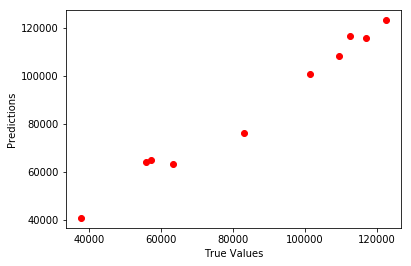

In [79]:
plt.scatter(y_test, predictions, color='red')

plt.xlabel('True Values')
plt.ylabel('Predictions')
None

## Model Evaluation
For Linear Regression in scikit-learn, the method 'score' returns the coefficient of determination $R^2$ of the prediction: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The coefficient $R^2$ is defined as $1 - {u}/{v}$, where $u$ is the residual sum of squares $\Sigma(y_{true} - y_{pred})^2$ and $v$ is the total sum of squares $\Sigma(y_{true} - \bar y_{true})^2$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of $y$, disregarding the input features, would get a $R^2$ score of 0.0.

To find 'score' of the model one use X_test and y_test as an input, so that model makes the predictions and then calculate the difference between actual and predicted values. 

In [80]:
model.score(X_test, y_test)

0.9749154407708353

## Further Model Evaluation

You might want to look at other metrics apart from the one already in the 'score' method of the model, in which case you can compute them usind the metrics package from sklearn 

In [81]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Var Score',metrics.explained_variance_score(y_test,predictions))

MAE 3426.4269374307123
MSE 21026037.329511296
RMSE 4585.4157204675885
Explained Var Score 0.9773004276108124


# Part 2: Polynomial Linear Regression
Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

In [82]:
#Select X and y values (predictor and outcome)
X = data.iloc[:,:-1].values # YearsExperience
y = data.iloc[:,-1].values # Salary

## Split the Data on Train and Test sets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 10 samples.


## Define the Model

In [84]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Transform Linear Model to Polynomial Matrix (both train and test)

In [85]:
from sklearn.preprocessing import PolynomialFeatures

#2 Degrees
poly_model2 = PolynomialFeatures(degree=2)
X_poly2 = poly_model2.fit_transform(X_train)
X_poly2_test = poly_model2.transform(X_test)

#3 Degrees
poly_model3 = PolynomialFeatures(degree=3)
X_poly3 = poly_model3.fit_transform(X_train)
X_poly3_test = poly_model3.transform(X_test)

#4 Degrees
poly_model4 = PolynomialFeatures(degree=4)
X_poly4 = poly_model4.fit_transform(X_train)
X_poly4_test = poly_model4.transform(X_test)

In [86]:
#Polynomial Matrices
print(X_poly2)
print(X_poly3)
print(X_poly4)

[[  1.     2.9    8.41]
 [  1.     5.1   26.01]
 [  1.     3.2   10.24]
 [  1.     4.5   20.25]
 [  1.     8.2   67.24]
 [  1.     6.8   46.24]
 [  1.     1.3    1.69]
 [  1.    10.5  110.25]
 [  1.     3.     9.  ]
 [  1.     2.2    4.84]
 [  1.     5.9   34.81]
 [  1.     6.    36.  ]
 [  1.     3.7   13.69]
 [  1.     3.2   10.24]
 [  1.     9.    81.  ]
 [  1.     2.     4.  ]
 [  1.     1.1    1.21]
 [  1.     7.1   50.41]
 [  1.     4.9   24.01]
 [  1.     4.    16.  ]]
[[1.000000e+00 2.900000e+00 8.410000e+00 2.438900e+01]
 [1.000000e+00 5.100000e+00 2.601000e+01 1.326510e+02]
 [1.000000e+00 3.200000e+00 1.024000e+01 3.276800e+01]
 [1.000000e+00 4.500000e+00 2.025000e+01 9.112500e+01]
 [1.000000e+00 8.200000e+00 6.724000e+01 5.513680e+02]
 [1.000000e+00 6.800000e+00 4.624000e+01 3.144320e+02]
 [1.000000e+00 1.300000e+00 1.690000e+00 2.197000e+00]
 [1.000000e+00 1.050000e+01 1.102500e+02 1.157625e+03]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01]
 [1.000000e+00 2.200000e

## Create New Lin Models Using Poly Matrix

In [87]:
lin_model2 = LinearRegression(fit_intercept=False)
lin_model2.fit(X_poly2,y_train)

lin_model3 = LinearRegression(fit_intercept=False)
lin_model3.fit(X_poly3,y_train)

lin_model4 = LinearRegression(fit_intercept=False)
lin_model4.fit(X_poly4,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

## Visualising the Models

### Linear Regression

In [109]:
#put X and y together in zipped list and sort it by the first element
zipped = sorted(zip(X_test, lin_model.predict(X_test)))

#extract variables from the list otherwise we cannot plot 
X_test_sorted, y_pred_sorted = zip(*zipped)

Intercept 26816.19224403119
Coefficients [9345.94244312]
0.9749154407708353
MAE 3426.4269374307123
MSE 21026037.329511296
RMSE 4585.4157204675885
Explained Var Score 0.9773004276108124


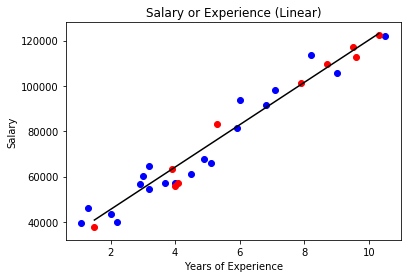

In [110]:
plt.scatter(X_train,y_train, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted,color = 'black')
plt.title('Salary or Experience (Linear)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

predictions = lin_model.predict(X_test)
print('Intercept', lin_model.intercept_)
print('Coefficients', lin_model.coef_)
print(lin_model.score(X_test, y_test))
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Var Score',metrics.explained_variance_score(y_test,predictions))
plt.show()

### Polynomial Regression 2 Deg

In [111]:
#put X and y together in zipped list and sort it by the first element
zipped = sorted(zip(X_test, lin_model2.predict(poly_model2.fit_transform(X_test))))

#extract variables from the list otherwise we cannot plot 
X_test_sorted, y_pred_sorted2 = zip(*zipped)

Intercept 0.0
Coefficients [28150.60458913  8712.28148584    57.78239507]
0.9742792461789873
MAE 3562.939035525868
MSE 21559299.68883049
RMSE 4643.1992945414795
Explained Var Score 0.9771824709901481


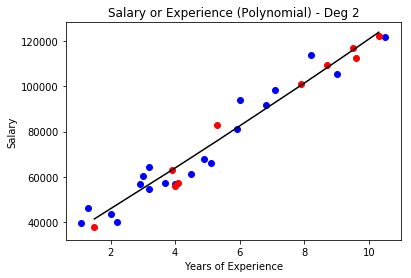

In [113]:
plt.scatter(X_train,y_train, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test_sorted,y_pred_sorted2,color = 'black')
plt.title('Salary or Experience (Polynomial) - Deg 2')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

predictions_2 = lin_model2.predict(X_poly2_test)
print('Intercept', lin_model2.intercept_)
print('Coefficients', lin_model2.coef_)
print(lin_model2.score(X_poly2_test, y_test))
print('MAE',metrics.mean_absolute_error(y_test,predictions_2))
print('MSE',metrics.mean_squared_error(y_test,predictions_2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print('Explained Var Score',metrics.explained_variance_score(y_test,predictions_2))
plt.show()

### Polynomial Regression 3 Deg

In [114]:
#put X and y together in zipped list and sort it by the first element
zipped = sorted(zip(X_test, lin_model3.predict(poly_model3.fit_transform(X_test))))

#extract variables from the list otherwise we cannot plot 
X_test_sorted, y_pred_sorted3 = zip(*zipped)

Intercept 0.0
Coefficients [42060.48813548 -2343.14885868  2372.33722618  -136.77910017]
0.9764448601295803
MAE 3884.8525566233534
MSE 19744068.28091576
RMSE 4443.42978800338


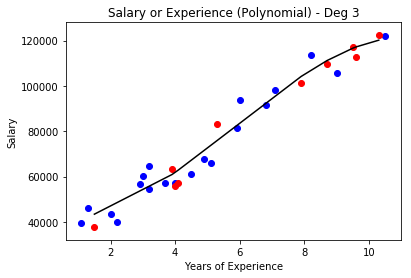

In [115]:
plt.scatter(X_train,y_train, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test_sorted,y_pred_sorted3,color = 'black')
plt.title('Salary or Experience (Polynomial) - Deg 3')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

predictions_3 = lin_model3.predict(X_poly3_test)
print('Intercept', lin_model3.intercept_)
print('Coefficients', lin_model3.coef_)
print(lin_model3.score(X_poly3_test, y_test))
print('MAE',metrics.mean_absolute_error(y_test,predictions_3))
print('MSE',metrics.mean_squared_error(y_test,predictions_3))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
plt.show()

### Polynomial Regression 4 Deg

In [116]:
#put X and y together in zipped list and sort it by the first element
zipped = sorted(zip(X_test, lin_model4.predict(poly_model4.fit_transform(X_test))))

#extract variables from the list otherwise we cannot plot 
X_test_sorted, y_pred_sorted4 = zip(*zipped)

Intercept 0.0
Coefficients [ 3.69644593e+04  3.55323371e+03  3.10709228e+02  1.36612121e+02
 -1.20714280e+01]
0.9735947527382923
MAE 4214.726206607711
MSE 22133046.450907417
RMSE 4704.577180885379
Explained Var Score 0.9770541144546038


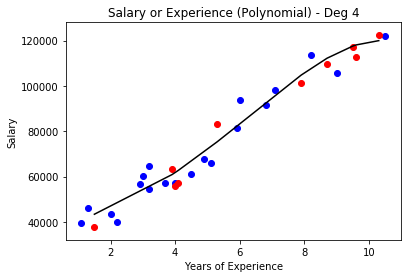

In [117]:
plt.scatter(X_train,y_train, color = 'blue')
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test_sorted, y_pred_sorted4,color = 'black')
plt.title('Salary or Experience (Polynomial) - Deg 4')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

predictions_4 = lin_model4.predict(X_poly4_test)
print('Intercept', lin_model4.intercept_)
print('Coefficients', lin_model4.coef_)
print(lin_model4.score(X_poly4_test, y_test))
print('MAE',metrics.mean_absolute_error(y_test,predictions_4))
print('MSE',metrics.mean_squared_error(y_test,predictions_4))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print('Explained Var Score',metrics.explained_variance_score(y_test,predictions_4))
plt.show()

In [118]:
# Predict for 6 years of experience using all the models
# need to reshape into shape (1,1) or will break
print(lin_model.predict(np.array([6]).reshape(1,1))) #Linear regression
print(lin_model2.predict(poly_model2.fit_transform(np.array([6]).reshape(1,1)))) #Poly - Deg 2
print(lin_model3.predict(poly_model3.fit_transform(np.array([6]).reshape(1,1)))) #Poly - Deg 3
print(lin_model4.predict(poly_model4.fit_transform(np.array([6]).reshape(1,1)))) #Poly - Deg 4

[82891.84690277]
[82504.45972659]
[83861.44948828]
[83333.04134851]


# Part 3: Choose the Best Model 
Which one of the 4 models will you use and why?

How we define the best model? The $R^2$ score might help! As well as model complexity. You need to find the balance between it. 

Readmore about Train and Test errors: https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

In [119]:
LM1 = lin_model.score(X_test, y_test)
LM2 = lin_model2.score(X_poly2_test, y_test)
LM3 = lin_model3.score(X_poly3_test, y_test)
LM4 = lin_model4.score(X_poly4_test, y_test)

models = ['LM1', 'LM2', 'LM3', 'LM4']
scores = [LM1, LM2, LM3, LM4]

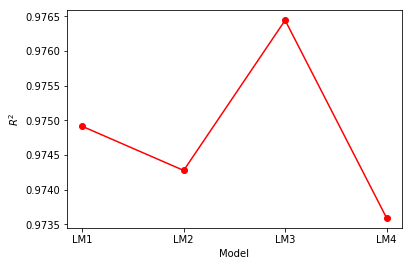

In [120]:
plt.plot(models,scores, '-ro')

plt.xlabel('Model')
plt.ylabel('$R^2$')
None

## Answer:
- We can choose the linear regression (lin_model) as it is the simplest model and $R^2$ is very close to that of the other models. Depending on random data splitting into train and test sets, results could be different.